 # Kraken BTC/USD Analysis

## Questions to answer:

What are the best days of the week, and times of day, to buy and sell?

 1. What days of the week have the highest highs, and the lowest lows?
 2. What time of day do highs and lows of the day occur?

## Libraries and setup

In [1]:
# Import libraries
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
# List of periods
periods = {
    '60': '1m',  # 1 Minute
    '180': '3m', # 3 Minutes
    '300': '5m',
    '900': '15m',
    '1800': '30m',
    '3600': '1h', # 1 Hour
    '7200': '2h',
    '14400': '4h',
    '21600': '6h',
    '43200': '12h',
    '86400': '1d', # 1 Day
    '259200': '3d',
    '604800': '1w', # 1 Week
}

### Access Kraken BTC/USD summary

In [3]:
kraken_url = 'https://api.cryptowat.ch/markets/kraken/btcusd/summary'
resp = requests.get(kraken_url)
resp.json()

{'result': {'price': {'last': 6960.1,
   'high': 6966.1,
   'low': 6771.9,
   'change': {'percentage': 0.0127022465370737, 'absolute': 87.3}},
  'volume': 5148.66828333,
  'volumeQuote': 35361416.236040644},
 'allowance': {'cost': 5835005,
  'remaining': 3992964002,
  'remainingPaid': 0,
  'upgrade': 'Upgrade for a higher allowance, starting at $15/month for 16 seconds/hour. https://cryptowat.ch/pricing'}}

### Import 1-week and 1-day period data

In [4]:
# Get historic data from OHLC (open high low close)
kraken_data_url = 'https://api.cryptowat.ch/markets/kraken/btcusd/ohlc'

# Looking at 1 week periods
week = '604800'
params = {'periods': week}

# Access API and request 1 week periods
resp = requests.get(kraken_data_url, params)
resp.ok

True

In [5]:
# convert json to python data
data = resp.json()

# create a data frame 
week_df = pd.DataFrame(
    data['result'][week], 
    columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])

# drop NA column
week_df.drop(columns=['NA'], inplace=True)

# Create Date column as the datetime equivalent of CloseTime
week_df['Date'] = pd.to_datetime(week_df['CloseTime'], unit='s')

# Make Date column the index
week_df.set_index(week_df['Date'], inplace=True)

# Data preview
week_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date
Date,,,,,,,
2013-10-17,1381968000,125.85000,153.00000,125.8500,138.09000,42.634753,2013-10-17
2013-10-24,1382572800,138.09000,203.45000,137.5200,203.45000,171.619985,2013-10-24
2013-10-31,1383177600,203.45000,207.30246,169.9201,203.77000,242.176755,2013-10-31
2013-11-07,1383782400,203.77000,269.42566,199.0000,263.73672,198.738897,2013-11-07
2013-11-14,1384387200,263.73672,500.00000,262.8628,398.00000,194.705865,2013-11-14


In [6]:
# Import kraken data with days as period
day = '86400'
day_params = {'periods': day}
resp = requests.get(kraken_data_url, day_params)
resp.ok

True

In [7]:
data = resp.json()

# Dataframe with daily data
day_df = pd.DataFrame(data['result'][day], columns=
    ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])

# Clean the df
day_df.drop(columns=['NA'], inplace=True)
day_df['Date'] = pd.to_datetime(day_df['CloseTime'], unit='s')
day_df.set_index('Date', inplace=True)

day_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
Date,,,,,,
2013-10-08,1381190400,123.61,123.61000,123.61,123.61,0.1000
2013-10-09,1381276800,123.61,124.19000,123.90,124.18,3.9916
2013-10-10,1381363200,124.18,124.01687,123.84,123.84,2.8230
2013-10-11,1381449600,123.84,125.86000,125.85,125.86,2.0000
2013-10-13,1381622400,125.86,127.50000,127.00,127.00,4.0000


### Plot weekly close price against daily close price

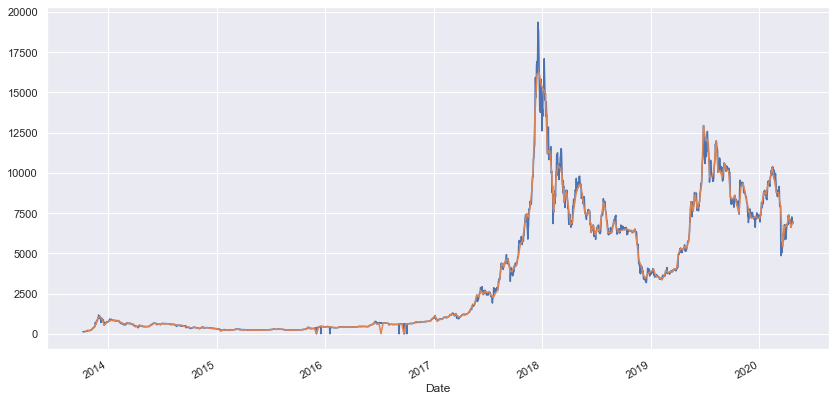

In [8]:
day_df['ClosePrice'].plot(figsize=(14,7))
week_df['ClosePrice'].plot(figsize=(14,7))

### Mean daily close price

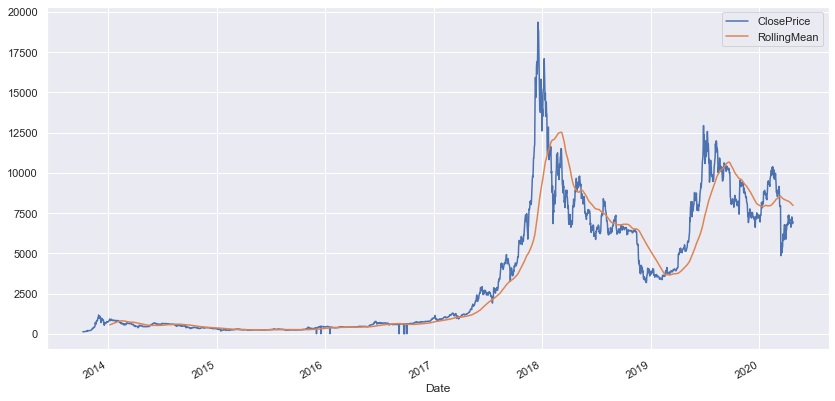

In [9]:
# Make a copy of day_df with only ClosePrice
daily_price = day_df[['ClosePrice']].copy()

# Calculate rolling 90-day mean
daily_price['RollingMean'] = daily_price['ClosePrice'].rolling(90).mean()
daily_price[95:99]

# Plot
daily_price.plot(figsize=(14,7))

## Calculate the day of the week in daily data

In [10]:
# Get the daily data
resp = requests.get(kraken_data_url, day_params)
data = resp.json()
dayofweek_df = pd.DataFrame(data['result'][day], columns=
    ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])

# Cleaning
dayofweek_df.drop(columns=['NA'], inplace=True)
dayofweek_df['Date'] = pd.to_datetime(dayofweek_df['CloseTime'], unit='s')

# Create day of week column
dayofweek_df['DayOfWeek'] = dayofweek_df['Date'].dt.day_name()

# now set index to date
#dayofweek_df.set_index('Date', inplace=True)
dayofweek_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date,DayOfWeek
0,1381190400,123.61,123.61000,123.61,123.61,0.1000,2013-10-08,Tuesday
1,1381276800,123.61,124.19000,123.90,124.18,3.9916,2013-10-09,Wednesday
2,1381363200,124.18,124.01687,123.84,123.84,2.8230,2013-10-10,Thursday
3,1381449600,123.84,125.86000,125.85,125.86,2.0000,2013-10-11,Friday
4,1381622400,125.86,127.50000,127.00,127.00,4.0000,2013-10-13,Sunday


In [11]:
# Copy the df 
day_group_df = dayofweek_df[['DayOfWeek','ClosePrice']].copy()

# Pass column I want to group by, then data to aggregate
average_price_by_day = day_group_df.groupby('DayOfWeek')['ClosePrice'].mean()

### Daily Close Price in 2020

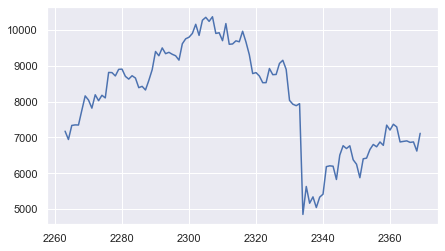

In [12]:
# Ok let's scale down for now and just look at rolling average over the course of 2020
start_date = '01-01-2020'
end_date = '4-17-2020'
mask = (dayofweek_df['Date'] > start_date) & (dayofweek_df['Date'] <= end_date)

# Filter using our mask
days_2020_df = dayofweek_df.loc[mask]

# Look at only the mean per day of the week in 2020
#days2020_grouped = day_2020.groupby('DayOfWeek')['ClosePrice'].mean()

days_2020_df['ClosePrice'].plot(figsize=(7,4))

### Calculate Highest High and Lowest Low By Day Of Week and Hour of Day

Which day per week has the highest high/lowest low of the week?
- From data frame of prices by day (days2020), group by day of week
- Plot the highs, lows, and close of each day 

/Users/amanda/dev/playground/crypto-analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


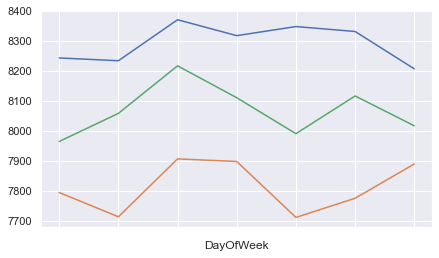

In [13]:
# Highest High Per Week and Lowest Low Per Week

from pandas.api.types import CategoricalDtype

# Sort days of the week properly and apply to dataframe
day_cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=day_cats, ordered=True)

days_2020_df['DayOfWeek'] = days_2020_df['DayOfWeek'].astype(cat_type)

# Filter data frame down to only High, Low, Close, Date, and DayOfWeek
price_by_day_2020_filtered = days_2020_df[['HighPrice', 'LowPrice', 'ClosePrice', 'Date', 'DayOfWeek']].copy()

# Group by day of week in new dataframe
high_by_dayofweek_2020 = days_2020_df.groupby('DayOfWeek')['HighPrice'].mean()
low_by_dayofweek_2020 = days_2020_df.groupby('DayOfWeek')['LowPrice'].mean()
close_by_dayofweek_2020 = days_2020_df.groupby('DayOfWeek')['ClosePrice'].mean()

high_by_dayofweek_2020.plot(figsize=(7,4))
low_by_dayofweek_2020.plot(figsize=(7,4))
close_by_dayofweek_2020.plot(figsize=(7,4))

In [14]:
# Import kraken data with minutes as period
min_num = '60'
min_params = {'periods': min_num}
resp = requests.get(kraken_data_url, min_params)

data = resp.json()

# Dataframe with minutes data
min_df = pd.DataFrame(data['result'][min_num], columns=
    ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])

# Clean the df
min_df.drop(columns=['NA'], inplace=True)

# Index datetime
min_df['datetime'] = pd.to_datetime(min_df['CloseTime'], unit='s')
min_df = min_df.set_index('datetime')

min_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
datetime,,,,,,
2020-04-21 14:40:00,1587480000,6869.5,6870.0,6869.5,6870.0,3.017359
2020-04-21 14:41:00,1587480060,6871.0,6871.3,6871.0,6871.3,3.086546
2020-04-21 14:42:00,1587480120,6872.0,6872.0,6871.0,6871.0,7.163304
2020-04-21 14:43:00,1587480180,6868.4,6868.4,6866.8,6866.9,1.827380
2020-04-21 14:44:00,1587480240,6866.2,6866.2,6857.7,6857.7,1.836664


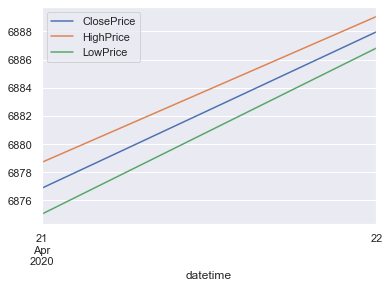

In [15]:
# Use resample method to extract data

min_df[['ClosePrice','HighPrice','LowPrice']].resample('d').mean().plot()

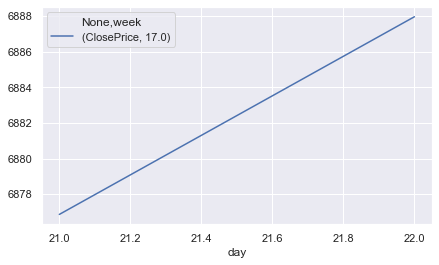

In [16]:
# Extract different time periods from timestamp index
min_df['day'] = min_df.index.day
min_df['hour'] = min_df.index.hour
min_df['week'] = min_df.index.week
min_df['year'] = min_df.index.year

# Extract weekly data per day
data_by_week = min_df.resample('d').mean().set_index(['day', 'week']).unstack('week')

data_by_week[['ClosePrice']].plot(figsize=(7,4))

In [17]:
# group by year and day

year_grouped = min_df.groupby('day')['ClosePrice'].mean()

year_grouped.head()

day
21    6876.861835
22    6887.962198
Name: ClosePrice, dtype: float64

In [22]:
# Import kraken data with days as period
day = '86400'
day_params = {'periods': day}
resp = requests.get(kraken_data_url, day_params)
resp.ok

data = resp.json()

# Dataframe with day data
day_df = pd.DataFrame(data['result'][day], columns=
    ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])

# Clean the df
day_df.drop(columns=['NA'], inplace=True)
day_df['Date'] = pd.to_datetime(day_df['CloseTime'], unit='s')

from pandas.api.types import CategoricalDtype
# Create day of week column
day_df['DayOfWeek'] = day_df['Date'].dt.day_name()

# Index datetime
day_df['datetime'] = pd.to_datetime(day_df['CloseTime'], unit='s')
day_df = day_df.set_index('datetime')

day_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date,DayOfWeek
datetime,,,,,,,,
2013-10-08,1381190400,123.61,123.61000,123.61,123.61,0.1000,2013-10-08,Tuesday
2013-10-09,1381276800,123.61,124.19000,123.90,124.18,3.9916,2013-10-09,Wednesday
2013-10-10,1381363200,124.18,124.01687,123.84,123.84,2.8230,2013-10-10,Thursday
2013-10-11,1381449600,123.84,125.86000,125.85,125.86,2.0000,2013-10-11,Friday
2013-10-13,1381622400,125.86,127.50000,127.00,127.00,4.0000,2013-10-13,Sunday


## Which days of week have the highest high
- From the dataframe that has data imported by day (day_df)
- Select only the high price and day of the week
- group by day of the week
- plot

In [26]:
# Add day, weekly, yearly data to columns
day_df['day'] = day_df.index.day
day_df['week'] = day_df.index.week
day_df['year'] = day_df.index.year


# Sort days of the week properly and apply to dataframe
day_cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=day_cats, ordered=True)

day_df['DayOfWeek'] = day_df['DayOfWeek'].astype(cat_type)

day_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date,DayOfWeek,day,week,year
datetime,,,,,,,,,,,
2013-10-08,1381190400,123.61,123.61000,123.61,123.61,0.1000,2013-10-08,Tuesday,8,41,2013
2013-10-09,1381276800,123.61,124.19000,123.90,124.18,3.9916,2013-10-09,Wednesday,9,41,2013
2013-10-10,1381363200,124.18,124.01687,123.84,123.84,2.8230,2013-10-10,Thursday,10,41,2013
2013-10-11,1381449600,123.84,125.86000,125.85,125.86,2.0000,2013-10-11,Friday,11,41,2013
2013-10-13,1381622400,125.86,127.50000,127.00,127.00,4.0000,2013-10-13,Sunday,13,41,2013


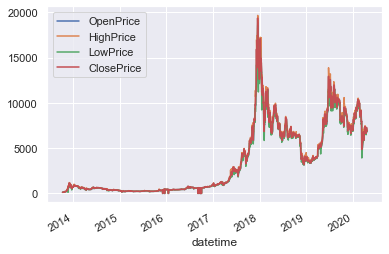

In [28]:
# Plot the data!
day_df[['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice']].plot()

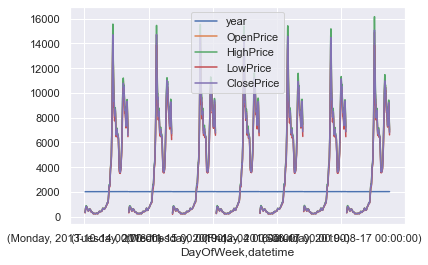

In [73]:
# Group by day of week, then group by year
groupsday = day_df[['year','DayOfWeek','OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice']].groupby('DayOfWeek').rolling(7).mean()

groupsday.plot()

In [75]:
# Group by Year, over time
groups1 = groupsday[['year','OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice']].groupby('year').rolling(7).mean()

In [76]:
groups1.head()

year  OpenPrice  HighPrice  LowPrice  ClosePrice
year   DayOfWeek datetime                                                    
2013.0 Monday    2013-11-25   NaN        NaN        NaN       NaN         NaN
                 2013-12-02   NaN        NaN        NaN       NaN         NaN
                 2013-12-09   NaN        NaN        NaN       NaN         NaN
                 2013-12-16   NaN        NaN        NaN       NaN         NaN
                 2013-12-23   NaN        NaN        NaN       NaN         NaN

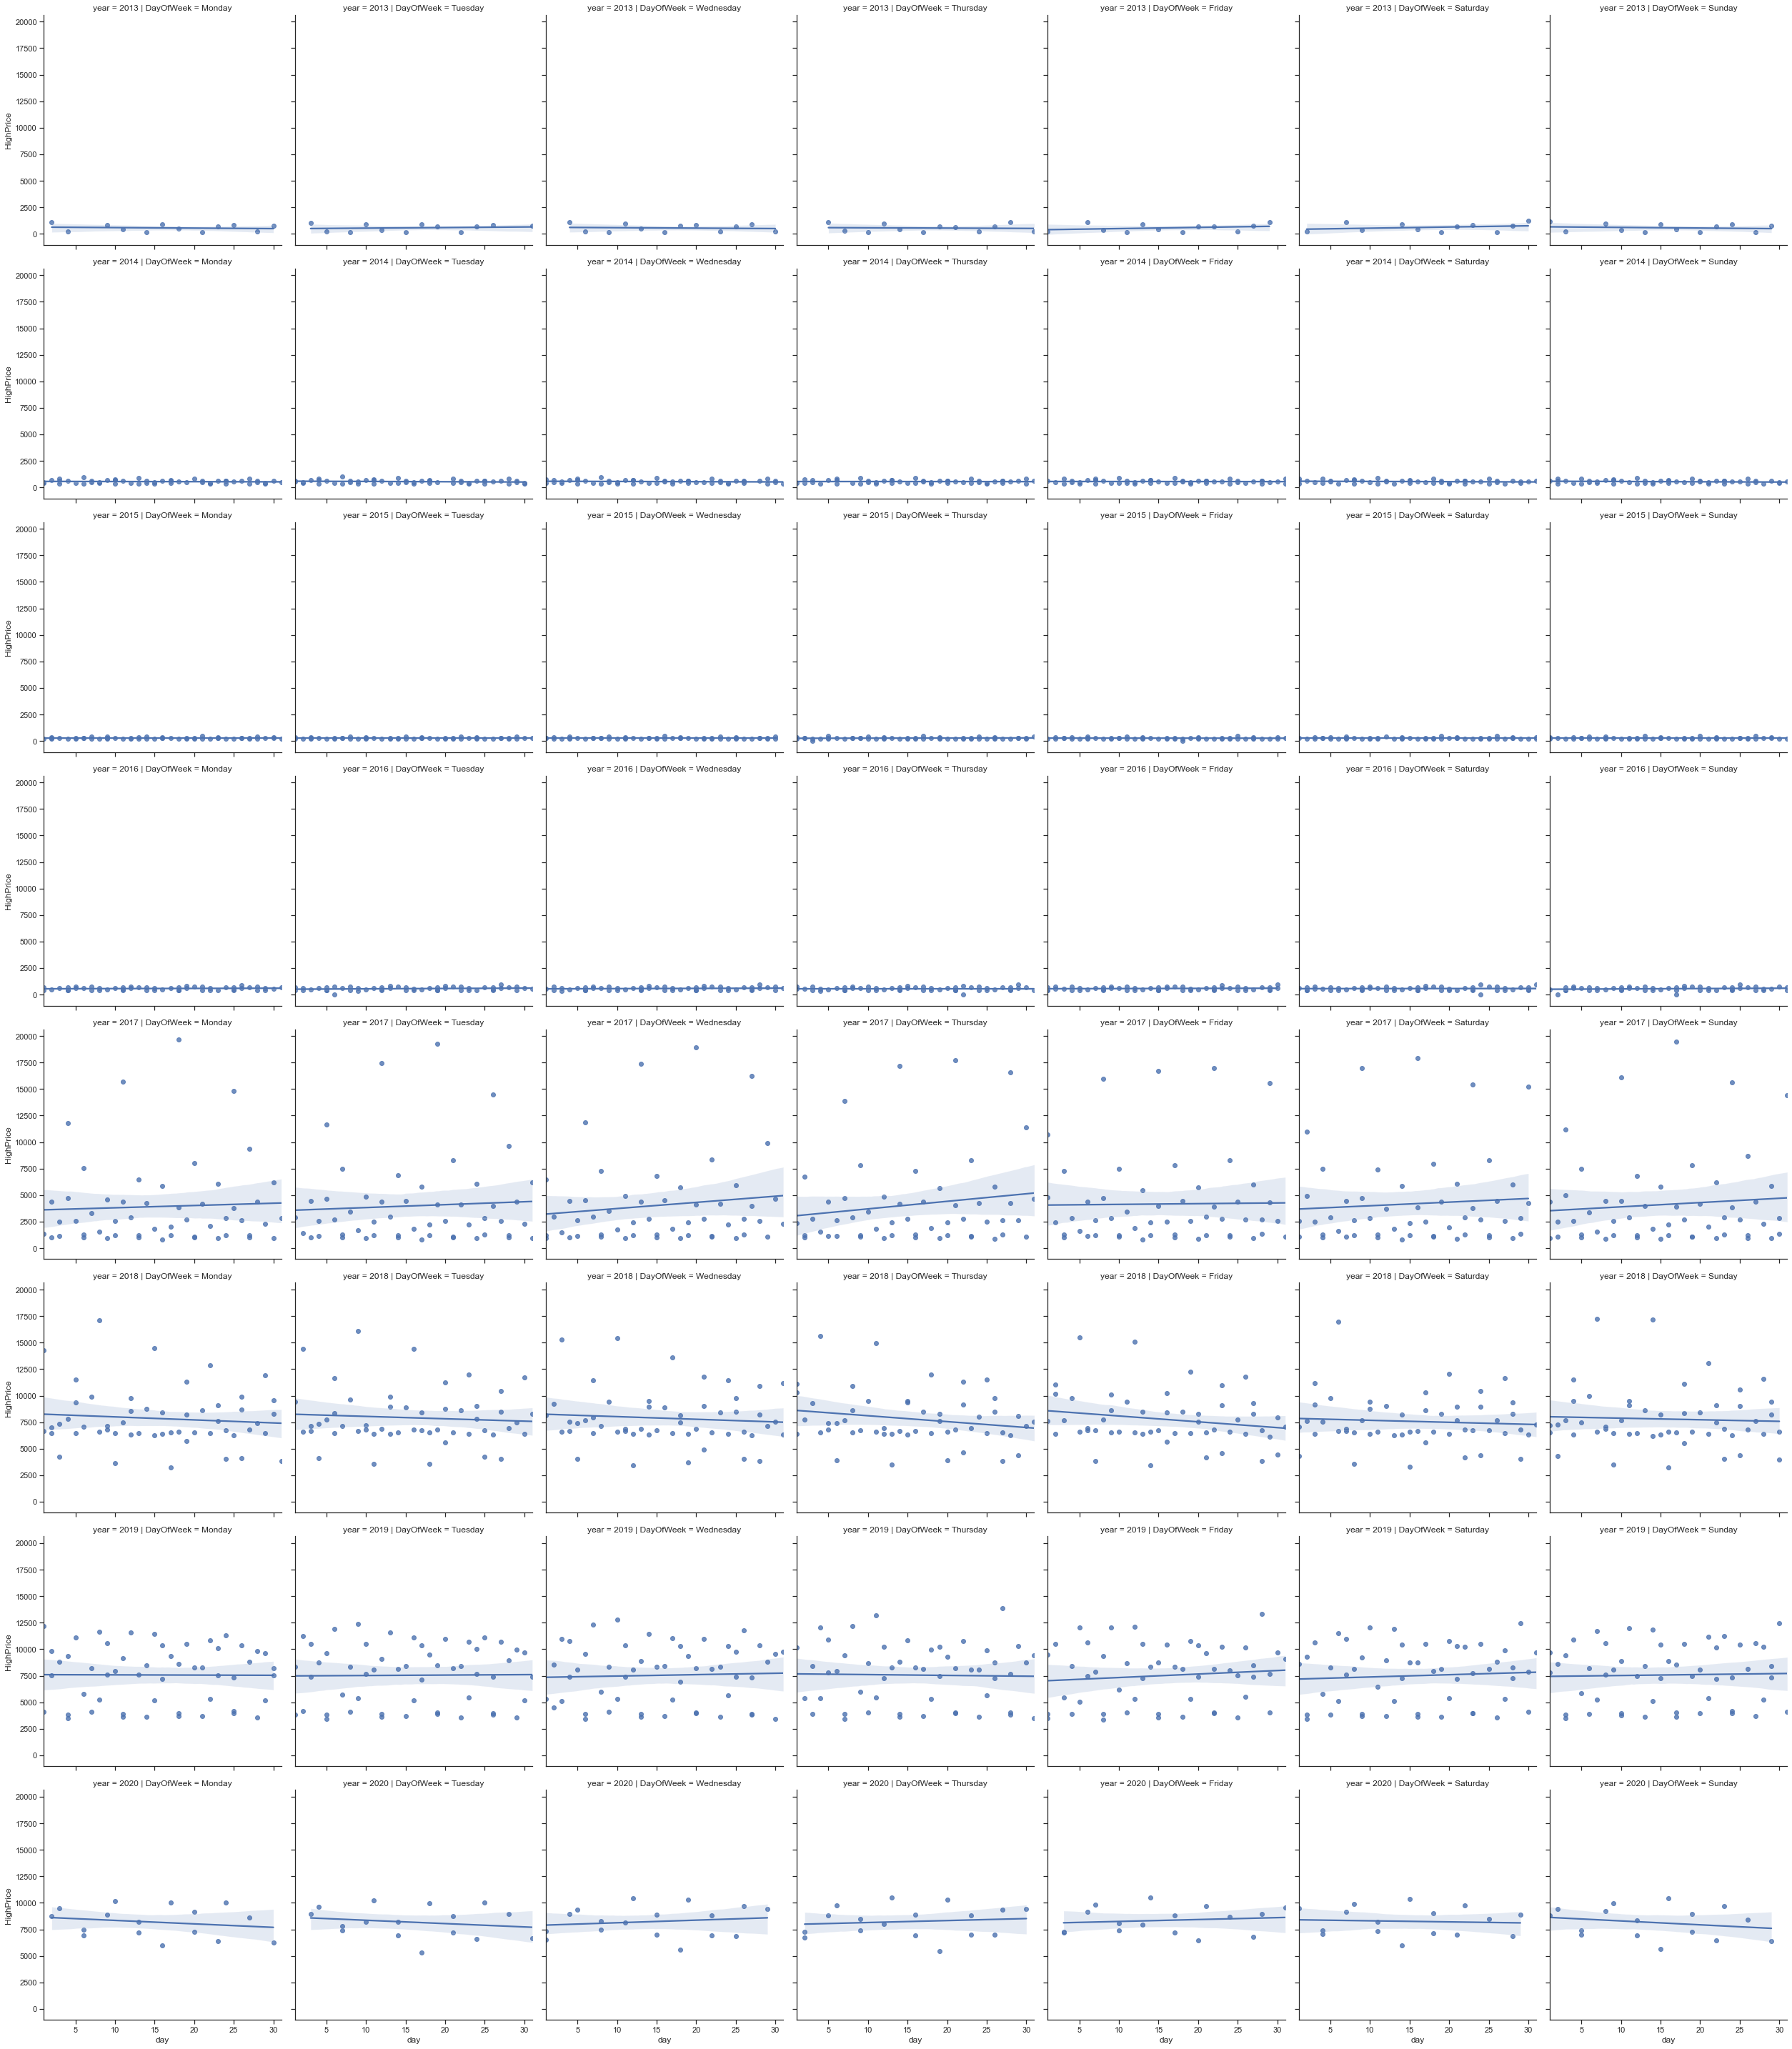

In [135]:
# Now, facet the plot by year
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.lmplot(data=day_df, x='day', y='HighPrice', row='year', col='DayOfWeek')

## Make dataset longform

- Columns:
    - datetime index
    - price
    - pricetype =(high, low, open, or close)
    - datetime sorting = (year, day, dayofweek, hour)
- Rows:
    - Each row is a single price point for that index
- Then can group by pricetype, and date subdivision